# Elliptical, parabolic, and hyperbolic orbits using the Euler method

In the simple_two_body.ipynb notebook I implemented circular orbits with arbitary starting positions and confirmed that the truncation error converged linearly with timestep for the Euler method.  

In this notebook I plan to implement hyperbolic, elliptical, and parabolic orbits using the Euler method. Parabolic orbits are marginally bound, hyperbolic orbits are unbound, and elliptical orbits are bound but oblong. All orbits should have the center of mass at one focus for both stars orbit and be symmetric between the two stars. 

Elliptical orbits should be elongated away from the other star. 

Hyperbolic and parabolic orbits should open away from the other star. 

All orbits should conserve energy and angular momentum. Later this could be enforced. I will probably not do that in this notebook. 

It would be meaningless to evaluate the L0 error for a hyperbolic or parabolic orbit since there is no cycle and the L0 error is found after one or more cycles when the system returns to its starting point. However, it would be possible to evaluate it for the elliptical orbit system, and I intend to check that the convergence of the L0 error with dt is linear as it should be for the Euler method. 

Because the convergence can be tested for ellipses only and because ellipses are closed so make it clear if they are not working correctly graphically, I will begin with ellipses then proceed to parabolas and hyperbolas. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def NewtonianForce(mass1,mass2, r):
    return (6.67408*10**-11)*mass1*mass2/r/r;

In [2]:
def euler(h,t, x,y,z,f,debugprint):
    xstep = (f(t, x, y,z)+f(t+h,x+h,y,z))/2*h
    xnew=x+xstep
    if(debugprint):
        print(h,t,x,xstep,xnew)
    return t+h,xnew

In [21]:
import math
def InitialDataEqualMassConic(ecc,angle,initmass):
    orbitalangle=angle
    print("angle",angle)
    phi=np.array([orbitalangle,math.pi+orbitalangle])
    orbitalradius=100*np.ones(2) #semimajor axis
    eccentricity=ecc
    print(eccentricity)
    mass=np.ones(2)
    masses=initmass*mass #*masssun (natural units)
    return phi,orbitalangle,orbitalradius,eccentricity, masses
    

In [29]:
import random,numpy as np
initdateqellipse=InitialDataEqualMassConic(0.3,0.0,1.)
print(initdateqellipse)

angle 0.0
0.3
(array([0.        , 3.14159265]), 0.0, array([100., 100.]), 0.3, array([1., 1.]))


In [43]:
def getxyuveqconicredmass(initdat):
    phi,orbitangle,orbitalradius,eccentricity, masses=initdat
    print("initdat", orbitalradius, phi, np.cos(phi), np.sin(phi))
    metersperAU=1
    Gconstant=1
    #fix x0 y0 at one star, disregard initial data, use orbital radius as separation between stars
    #this is consistant with choice in previous part
    cosphi=np.cos(phi)
    sinphi=np.sin(phi)
    coordsep=orbitalradius #/2.
    print("coordsep",coordsep)
    #x0=orbitalradius/2.*np.cos(phi)*metersperAU
    #y0=orbitalradius/2.*np.sin(phi)*metersperAU
    count=0
    for phi0 in phi:
        if phi0==0:
            print("zero")
            #x0[count]=orbitalradius[count]/2.
            #y0[count]=0
            cosphi[count]=1.0
            sinphi[count]=0.0
        if phi0==math.pi:
            cosphi[count]=-1.0
            sinphi[count]=0.0
            print("pi")
            #x0[count]=-orbitalradius[count]/2.
            #y0[count]=0
        if phi0==math.pi/2.:
            cosphi[count]=0.0
            sinphi[count]=1.0
            #x0[count]=0
            #y0[count]=orbitalradius[count]/2.
        if phi0==3*math.pi/2.:
            cosphi[count]=0.0
            sinphi[count]=-1.0
            #x0[count]=0
            #y0[count]=-orbitalradius[count]/2.
        count+=1
    x0=coordsep*cosphi
    y0=coordsep*sinphi
    #x0[1]=0.0
    #y0[1]=0.0
    z0=np.zeros(2)
    print(x0)
    print(y0)
    v=np.zeros(2)
    a=np.zeros(2)
    ax0=0.
    ay0=0.
    az0=0.
    vx0=0.
    vy0=0.
    vz0=0.
    print(eccentricity)
    if eccentricity<1 and eccentricity>0:
        #elliptical
        orbitalr=orbitalradius[0]/2. #reduced mass
        focusdisp=orbitalr*eccentricity*np.sqrt(1.-eccentricity**2) #displacement of the center due to the focus being at the center
        E=-Gconstant*masses[0]*masses[1]/(2.*orbitalr) #orbitalradius is correct here r1+r2.
        #This factor of half is due to the virial (VEE-REE-AHL) theorem, a stellar dynamics theorem governing the 
        #equipartion of degrees of freedom of energy in a system. Another way of writing it is T=-1/2*V. 2T-V=0
        coordsep=orbitalr*(1.+eccentricity) #starts at apastron
        starsep=coordsep-focusdisp #reduced mass, M is at center, apastron
        Eapastron=-Gconstant*masses[0]*masses[1]/(2.*starsep) #factor of 2 virial again
        Fapastron=Eapastron/(starsep)
        print("E,F",E,Fapastron,2*orbitalr,starsep)
        x0=coordsep*cosphi
        y0=coordsep*sinphi
        x0[0]=0.0
        y0[0]=0.0
        v=np.zeros(2)
        v[0]=0.0
        v[1]=np.sqrt(2.*(E-2*Eapastron)/masses[1]) #1/2*mv^2-GMm/starsep=E. Solve for v. Eapastron=-GMm/2starsep
        ux0=-v*sinphi
        uy0=v*cosphi #initial data in y only 
        uz0=np.zeros(2)
    
        a=np.zeros(2)
        a[0]=0.0
        a[1]=Fapastron/masses[1]
    
        ax0=-a*cosphi
        ay0=-a*sinphi
        az0=np.zeros(2)
    elif eccentricity[0]==0.0: #circular
        #start at perihelion for both (eliptical, doesn't generalize to three body)
        #actually start with circular orbit
        ux0=np.zeros(2) #*149597870700
        #centrepital force balances gravitational force
        metersperAU=1 #natural units
        #G=1
        Gconstant=1
        #Fcentripital=mass1*v**2/rphys
        #centF=accel
        #Faccel=G*m1*m2/r^2
        r0=2.*orbitalradius #Mystery factor of 2
        print("r0", r0)
        v=np.zeros(2)
        for i in np.arange(2):
            v[i]=np.sqrt(Gconstant*masses[(i+1)%2]/np.abs(r0[i]))
        print(v)
        #r0=orbitalradius #np.sqrt(x0**2+y0**2)
        ux0=-v*sinphi
        uy0=v*cosphi #initial data in y only 
        uz0=np.zeros(2)
    
        a=np.zeros(2)
        for i in np.arange(2):
            a[i]=Gconstant*masses[(i+1)%2]/(r0[i]**2)
    
        ax0=-a*cosphi
        ay0=-a*sinphi
        az0=np.zeros(2)
    
    
    return masses,x0,y0,z0, ux0, uy0,uz0, ax0, ay0,az0

In [44]:
xyuvaeqconicredmass=getxyuveqconicredmass(initdateqellipse)
print(xyuvaeqconicredmass)

initdat [100. 100.] [0.         3.14159265] [ 1. -1.] [0.0000000e+00 1.2246468e-16]
coordsep [100. 100.]
zero
pi
[ 100. -100.]
[0. 0.]
0.3
E,F -0.01 -0.00019458519547641394 100.0 50.69091197874582
(array([1., 1.]), array([  0., -65.]), array([0., 0.]), array([0., 0.]), array([-0., -0.]), array([ 0.        , -0.13948048]), array([0., 0.]), array([-0.        , -0.00019459]), array([-0.,  0.]), array([0., 0.]))


In [45]:
def timestep(step,t,dt,mtotal, mass,xi,yi,zi, vxi, vyi, vzi, axi, ayi, azi):
    xii=np.zeros(np.size(xi))
    vxii=np.zeros(np.size(vxi))
    yii=np.zeros(np.size(yi))
    vyii=np.zeros(np.size(vyi))
    zii=np.zeros(np.size(vzi))
    vzii=np.zeros(np.size(vzi))
    rii=np.zeros(np.size(xi))
    axii=np.zeros(np.size(axi))
    ayii=np.zeros(np.size(ayi))
    azii=np.zeros(np.size(azi))
    
    #This is redundant in the center of mass system
    Gconstant=6.408*10**-11
    Gconstant=1
    for k in np.arange(len(rii)):
        for j in np.arange(len(rii)):
            if j!=k:
                if j==0: #reduced mass
                    axii[0]=0.0
                    ayii[0]=0.0
                    azii[0]=0.0
                else:
                    rreljk=np.abs((xi[j] - xi[k])**2+(yi[j]-yi[k])**2+(zi[j]-zi[k])**2)**(1./2.)
                    #print(rreljk)
                    axii[j]-=Gconstant*mass[k]*(xi[j]  - xi[k])/rreljk**3
                    ayii[j]-=Gconstant*mass[k]*(yi[j]  - yi[k])/rreljk**3
                    azii[j]-=Gconstant*mass[k]*(zi[j]  - zi[k])/rreljk**3
    #print(xii)
    
    for m in np.arange(len(x)):
        #m represents choices of mass
        i=step
        
        xii[m] = xi[m] + dt*vxi[m]
        vxii[m] = vxi[m] + dt*axi[m]
        yii[m]= yi[m] + dt*vyi[m]
        vyii[m] = vyi[m] + dt*ayi[m]
        zii[m]= zi[m] + dt*vzi[m]
        vzii[m] = vzi[m] + dt*azi[m]
        rii[m]=np.sqrt(xi[m]**2+yi[m]**2+zi[m]**2)
        
        #print(vyii[m],vyi[m],ayi[m],dt)
        #print(yii[m],yi[m],vyi[m],dt)
    
    
    return mass, xii,yii,zii,vxii,vyii,vzii,axii,ayii,azii
                    

In [46]:
dt=1 #*31556926 #seconds per year
numsteps=10000
mass0,x,y,z0,vx,vy,vz0,ax,ay,az0=xyuvaeqconicredmass
print(x)
xcoord1=[]
xcoord2=[]
ycoord1=[]
ycoord2=[]
t=0.0
masstotal=1.
for i in np.arange(1,numsteps):
    mass, x,y,z,vx,vy,vz,ax,ay,az=timestep(i,t,dt,masstotal,mass0,x,y,z0,vx,vy,vz0,ax,ay,az0)
    print(x,y,vx,vy,ax,ay)
    #print(ay) #forces should be equal and opposite, but in reduced mass framework accelerations are also equal and opposite
    #accelerations should evolve from y to x with time in a sinusoidal manner even in reduced mass framework
    #print(ax)
    xcoord1.append(x[0])
    xcoord2.append(x[1])
    ycoord1.append(y[0])
    ycoord2.append(y[1])
#mass, x,y,z,vx,vy,vz,ax,ay,az=timestep(2,0,dt,mass,x,y,z,vx,vy,vz,ax,ay,az)
#print(x,y,vx,vy,ax,ay) 
#mass, x,y,z,vx,vy,vz,ax,ay,az=timestep(3,0,dt,mass,x,y,z,vx,vy,vz,ax,ay,az)
#print(x,y,vx,vy,ax,ay) 
#mass, x,y,z,vx,vy,vz,ax,ay,az=timestep(4,0,dt,mass,x,y,z,vx,vy,vz,ax,ay,az)
#print(x,y,vx,vy,ax,ay) 

[  0. -65.]
[  0. -65.] [ 0.         -0.13948048] [-0.         -0.00019459] [ 0.         -0.13948048] [0.         0.00023669] [0. 0.]
[  0.         -65.00019459] [ 0.         -0.27896096] [0.00000000e+00 4.21011951e-05] [ 0.         -0.13948048] [0.         0.00023668] [0.00000000e+00 5.07890818e-07]
[  0.         -65.00015248] [ 0.         -0.41844144] [0.         0.00027879] [ 0.         -0.13947997] [0.         0.00023668] [0.00000000e+00 1.01575147e-06]
[  0.        -64.9998737] [ 0.         -0.55792141] [0.         0.00051546] [ 0.         -0.13947896] [0.         0.00023667] [0.00000000e+00 1.52357754e-06]
[  0.         -64.99935823] [ 0.         -0.69740036] [0.         0.00075213] [ 0.         -0.13947743] [0.         0.00023666] [0.0000000e+00 2.0313628e-06]
[  0.        -64.9986061] [ 0.        -0.8368778] [0.        0.0009888] [ 0.        -0.1394754] [0.         0.00023665] [0.00000000e+00 2.53910099e-06]
[  0.        -64.9976173] [ 0.        -0.9763532] [0.         0.001225

[  0.         -60.52159651] [  0.         -27.12577078] [0.        0.0446935] [ 0.         -0.12998125] [0.         0.00020773] [0.00000000e+00 9.25885303e-05]
[  0.         -60.47690301] [  0.         -27.25575203] [0.         0.04490122] [ 0.         -0.12988866] [0.         0.00020746] [0.0000000e+00 9.2982208e-05]
[  0.         -60.43200179] [  0.         -27.38564069] [0.         0.04510868] [ 0.         -0.12979568] [0.         0.00020719] [0.00000000e+00 9.33748741e-05]
[  0.         -60.38689311] [  0.         -27.51543637] [0.         0.04531587] [ 0.        -0.1297023] [0.         0.00020691] [0.00000000e+00 9.37665259e-05]
[  0.         -60.34157724] [  0.         -27.64513867] [0.         0.04552278] [ 0.         -0.12960854] [0.         0.00020664] [0.00000000e+00 9.41571605e-05]
[  0.         -60.29605446] [  0.         -27.77474721] [0.         0.04572942] [ 0.         -0.12951438] [0.         0.00020637] [0.00000000e+00 9.45467752e-05]
[  0.         -60.25032503] [  0. 

[  0.         -54.81398093] [  0.        -40.0810927] [0.         0.06469953] [ 0.         -0.11843804] [0.        0.0001754] [0.         0.00012773]
[  0.         -54.74928139] [  0.         -40.19953074] [0.         0.06487494] [ 0.         -0.11831031] [0.         0.00017506] [0.         0.00012801]
[  0.         -54.68440646] [  0.         -40.31784105] [0.      0.06505] [ 0.        -0.1181823] [0.         0.00017472] [0.         0.00012829]
[  0.         -54.61935646] [  0.         -40.43602335] [0.         0.06522472] [ 0.         -0.11805401] [0.         0.00017437] [0.         0.00012856]
[  0.         -54.55413174] [  0.         -40.55407736] [0.         0.06539909] [ 0.         -0.11792545] [0.         0.00017403] [0.         0.00012884]
[  0.         -54.48873265] [  0.         -40.67200282] [0.         0.06557311] [ 0.         -0.11779662] [0.         0.00017368] [0.         0.00012911]
[  0.         -54.42315954] [  0.         -40.78979943] [0.        0.0657468] [ 0.      

[  0.         -42.38110955] [  0.         -57.34531381] [0.         0.08832536] [ 0.         -0.09506536] [0.         0.00011725] [0.         0.00015806]
[  0.         -42.29278419] [  0.         -57.44037917] [0.         0.08844261] [ 0.        -0.0949073] [0.         0.00011689] [0.         0.00015816]
[  0.         -42.20434157] [  0.         -57.53528647] [0.         0.08855951] [ 0.         -0.09474914] [0.         0.00011653] [0.         0.00015827]
[  0.         -42.11578207] [  0.         -57.63003561] [0.         0.08867604] [ 0.         -0.09459087] [0.         0.00011617] [0.         0.00015837]
[  0.         -42.02710603] [  0.         -57.72462648] [0.        0.0887922] [ 0.        -0.0944325] [0.         0.00011581] [0.         0.00015847]
[  0.         -41.93831383] [  0.         -57.81905899] [0.         0.08890801] [ 0.         -0.09427404] [0.         0.00011545] [0.         0.00015857]
[  0.         -41.84940582] [  0.         -57.91333303] [0.         0.08902346] [ 

[  0.         -30.64461138] [  0.         -67.90462842] [0.         0.10018218] [ 0.         -0.07495715] [0.0000000e+00 7.4437428e-05] [0.         0.00016423]
[  0.        -30.5444292] [  0.         -67.97958557] [0.         0.10025661] [ 0.         -0.07479293] [0.00000000e+00 7.41138364e-05] [0.         0.00016423]
[  0.         -30.44417259] [  0.         -68.05437849] [0.         0.10033073] [ 0.        -0.0746287] [0.00000000e+00 7.37906541e-05] [0.         0.00016423]
[  0.         -30.34384186] [  0.         -68.12900719] [0.         0.10040452] [ 0.         -0.07446447] [0.00000000e+00 7.34678821e-05] [0.         0.00016423]
[  0.         -30.24343734] [  0.         -68.20347166] [0.         0.10047799] [ 0.         -0.07430024] [0.00000000e+00 7.31455214e-05] [0.         0.00016423]
[  0.         -30.14295935] [  0.        -68.2777719] [0.         0.10055113] [ 0.         -0.07413601] [0.00000000e+00 7.28235732e-05] [0.         0.00016423]
[  0.         -30.04240822] [  0.   

[  0.         -16.67821965] [  0.         -76.49246183] [0.         0.10744425] [ 0.         -0.05316413] [0.00000000e+00 3.50195424e-05] [0.         0.00015947]
[  0.        -16.5707754] [  0.         -76.54562596] [0.         0.10747927] [ 0.         -0.05300466] [0.00000000e+00 3.47566293e-05] [0.         0.00015941]
[  0.         -16.46329613] [  0.         -76.59863062] [0.         0.10751403] [ 0.         -0.05284525] [0.00000000e+00 3.44941878e-05] [0.         0.00015934]
[  0.        -16.3557821] [  0.         -76.65147587] [0.         0.10754852] [ 0.         -0.05268591] [0.00000000e+00 3.42322179e-05] [0.         0.00015927]
[  0.         -16.24823358] [  0.         -76.70416178] [0.         0.10758275] [ 0.         -0.05252664] [0.00000000e+00 3.39707196e-05] [0.        0.0001592]
[  0.         -16.14065082] [  0.         -76.75668842] [0.         0.10761673] [ 0.         -0.05236744] [0.00000000e+00 3.37096928e-05] [0.         0.00015914]
[  0.        -16.0330341] [  0.   

[0.         1.23448993] [  0.         -83.13729956] [0.         0.11000812] [ 0.         -0.02812294] [ 0.00000000e+00 -1.95833884e-06] [0.         0.00014474]
[0.         1.34449805] [  0.        -83.1654225] [0.         0.11000616] [ 0.        -0.0279782] [ 0.00000000e+00 -2.14761383e-06] [0.         0.00014463]
[0.         1.45450422] [  0.        -83.1934007] [0.         0.11000402] [ 0.         -0.02783357] [ 0.00000000e+00 -2.33647719e-06] [0.         0.00014453]
[0.         1.56450823] [  0.         -83.22123427] [0.         0.11000168] [ 0.         -0.02768904] [ 0.0000000e+00 -2.5249295e-06] [0.         0.00014442]
[0.         1.67450991] [  0.         -83.24892331] [0.         0.10999915] [ 0.         -0.02754462] [ 0.00000000e+00 -2.71297133e-06] [0.         0.00014431]
[0.         1.78450906] [  0.         -83.27646794] [0.         0.10999644] [ 0.         -0.02740031] [ 0.00000000e+00 -2.90060326e-06] [0.        0.0001442]
[0.         1.89450551] [  0.         -83.30386825

[ 0.         18.90947974] [  0.         -85.88256911] [0.         0.10749219] [ 0.         -0.00612996] [ 0.00000000e+00 -2.76745762e-05] [0.        0.0001264]
[ 0.         19.01697193] [  0.         -85.88869906] [0.         0.10746451] [ 0.         -0.00600356] [ 0.00000000e+00 -2.78051478e-05] [0.         0.00012628]
[ 0.         19.12443644] [  0.         -85.89470262] [0.         0.10743671] [ 0.         -0.00587727] [ 0.0000000e+00 -2.7935408e-05] [0.         0.00012617]
[ 0.         19.23187315] [  0.         -85.90057989] [0.         0.10740877] [ 0.        -0.0057511] [ 0.00000000e+00 -2.80653574e-05] [0.         0.00012605]
[ 0.         19.33928193] [  0.         -85.90633099] [0.         0.10738071] [ 0.         -0.00562505] [ 0.00000000e+00 -2.81949966e-05] [0.         0.00012594]
[ 0.         19.44666263] [  0.         -85.91195604] [0.         0.10735251] [ 0.         -0.00549912] [ 0.00000000e+00 -2.83243261e-05] [0.         0.00012582]
[ 0.         19.55401515] [  0.   

[ 0.         32.60806403] [  0.         -85.66121712] [0.         0.10290423] [0.         0.00932804] [ 0.00000000e+00 -4.22515495e-05] [0.         0.00011136]
[ 0.         32.71096825] [  0.         -85.65188908] [0.         0.10286198] [0.        0.0094394] [ 0.00000000e+00 -4.23465916e-05] [0.         0.00011124]
[ 0.         32.81383023] [  0.         -85.64244968] [0.         0.10281963] [0.         0.00955064] [ 0.00000000e+00 -4.24413971e-05] [0.         0.00011113]
[ 0.         32.91664986] [  0.         -85.63289904] [0.         0.10277719] [0.         0.00966177] [ 0.00000000e+00 -4.25359666e-05] [0.         0.00011102]
[ 0.         33.01942705] [  0.         -85.62323727] [0.         0.10273465] [0.         0.00977279] [ 0.00000000e+00 -4.26303006e-05] [0.        0.0001109]
[ 0.        33.1221617] [  0.         -85.61346447] [0.         0.10269202] [0.         0.00988369] [ 0.00000000e+00 -4.27243997e-05] [0.         0.00011079]
[ 0.         33.22485372] [  0.         -85.60

[ 0.         46.85275078] [  0.         -83.25020698] [0.         0.09600177] [0.         0.02412002] [ 0.00000000e+00 -5.36778854e-05] [0.0000000e+00 9.5600953e-05]
[ 0.         46.94875255] [  0.         -83.22608696] [0.        0.0959481] [0.         0.02421562] [ 0.00000000e+00 -5.37440388e-05] [0.0000000e+00 9.5494977e-05]
[ 0.         47.04470065] [  0.         -83.20187133] [0.         0.09589435] [0.         0.02431112] [ 0.00000000e+00 -5.38100224e-05] [0.00000000e+00 9.53890648e-05]
[ 0.       47.140595] [  0.         -83.17756021] [0.         0.09584054] [0.         0.02440651] [ 0.00000000e+00 -5.38758363e-05] [0.00000000e+00 9.52832166e-05]
[ 0.         47.23643555] [  0.         -83.15315371] [0.         0.09578667] [0.         0.02450179] [ 0.00000000e+00 -5.39414812e-05] [0.00000000e+00 9.51774325e-05]
[ 0.         47.33222221] [  0.         -83.12865191] [0.         0.09573273] [0.         0.02459697] [ 0.00000000e+00 -5.40069573e-05] [0.00000000e+00 9.50717125e-05]
[ 

[ 0.         60.44513279] [  0.         -78.69534121] [0.         0.08742049] [0.         0.03715103] [ 0.00000000e+00 -6.18184296e-05] [0.00000000e+00 8.06378975e-05]
[ 0.         60.53255328] [  0.         -78.65819018] [0.         0.08735867] [0.         0.03723167] [ 0.00000000e+00 -6.18634055e-05] [0.00000000e+00 8.05418332e-05]
[ 0.         60.61991196] [  0.         -78.62095851] [0.         0.08729681] [0.         0.03731221] [ 0.00000000e+00 -6.19082627e-05] [0.00000000e+00 8.04458368e-05]
[ 0.         60.70720877] [  0.         -78.58364629] [0.        0.0872349] [0.         0.03739266] [ 0.00000000e+00 -6.19530016e-05] [0.00000000e+00 8.03499083e-05]
[ 0.         60.79444367] [  0.         -78.54625363] [0.         0.08717295] [0.         0.03747301] [ 0.00000000e+00 -6.19976224e-05] [0.00000000e+00 8.02540477e-05]
[ 0.         60.88161662] [  0.         -78.50878062] [0.         0.08711095] [0.         0.03755326] [ 0.00000000e+00 -6.20421254e-05] [0.0000000e+00 8.0158255e-

[ 0.         72.22076853] [  0.         -72.65641376] [0.       0.078243] [0.         0.04767131] [ 0.00000000e+00 -6.71432473e-05] [0.00000000e+00 6.76658922e-05]
[ 0.         72.29901153] [  0.         -72.60874245] [0.         0.07817586] [0.         0.04773897] [ 0.00000000e+00 -6.71740041e-05] [0.00000000e+00 6.75792066e-05]
[ 0.         72.37718738] [  0.         -72.56100348] [0.         0.07810868] [0.         0.04780655] [ 0.00000000e+00 -6.72046776e-05] [0.00000000e+00 6.74925842e-05]
[ 0.         72.45529607] [  0.         -72.51319693] [0.         0.07804148] [0.         0.04787404] [ 0.00000000e+00 -6.72352679e-05] [0.00000000e+00 6.74060251e-05]
[ 0.         72.53333755] [  0.         -72.46532289] [0.         0.07797424] [0.         0.04794145] [ 0.00000000e+00 -6.72657753e-05] [0.00000000e+00 6.73195291e-05]
[ 0.         72.61131179] [  0.         -72.41738144] [0.         0.07790698] [0.         0.04800877] [ 0.00000e+00 -6.72962e-05] [0.00000000e+00 6.72330962e-05]
[ 

[ 0.         82.78280142] [  0.         -65.13624195] [0.         0.06829497] [0.        0.0565526] [ 0.00000000e+00 -7.08076151e-05] [0.00000000e+00 5.58081828e-05]
[ 0.         82.85109638] [  0.         -65.07968936] [0.         0.06822416] [0.        0.0566084] [ 0.00000000e+00 -7.08282897e-05] [0.00000000e+00 5.57300374e-05]
[ 0.         82.91932054] [  0.         -65.02308095] [0.         0.06815333] [0.         0.05666413] [ 0.00000000e+00 -7.08489064e-05] [0.00000000e+00 5.56519469e-05]
[ 0.         82.98747387] [  0.         -64.96641682] [0.         0.06808248] [0.         0.05671979] [ 0.00000000e+00 -7.08694652e-05] [0.00000000e+00 5.55739114e-05]
[ 0.         83.05555635] [  0.         -64.90969703] [0.         0.06801161] [0.         0.05677536] [ 0.00000000e+00 -7.08899663e-05] [0.00000000e+00 5.54959307e-05]
[ 0.         83.12356796] [  0.         -64.85292167] [0.         0.06794072] [0.         0.05683086] [ 0.00000000e+00 -7.09104098e-05] [0.00000000e+00 5.54180048e-

[ 0.         90.94255695] [  0.         -57.47000845] [0.         0.05908188] [0.         0.06307895] [ 0.00000000e+00 -7.30286621e-05] [0.00000000e+00 4.62302348e-05]
[ 0.         91.00163883] [  0.        -57.4069295] [0.         0.05900885] [0.         0.06312518] [ 0.00000000e+00 -7.30429828e-05] [0.0000000e+00 4.6158597e-05]
[ 0.         91.06064768] [  0.         -57.34380432] [0.         0.05893581] [0.         0.06317134] [ 0.00000000e+00 -7.30572615e-05] [0.00000000e+00 4.60870058e-05]
[ 0.        91.1195835] [  0.         -57.28063298] [0.         0.05886275] [0.         0.06321743] [ 0.00000000e+00 -7.30714983e-05] [0.00000000e+00 4.60154612e-05]
[ 0.         91.17844625] [  0.         -57.21741555] [0.         0.05878968] [0.         0.06326344] [ 0.00000000e+00 -7.30856933e-05] [0.0000000e+00 4.5943963e-05]
[ 0.         91.23723593] [  0.        -57.1541521] [0.        0.0587166] [0.         0.06330939] [ 0.00000000e+00 -7.30998467e-05] [0.00000000e+00 4.58725113e-05]
[ 0.

[ 0.         99.88063465] [  0.         -46.20853559] [0.         0.04656676] [0.         0.06990956] [ 0.00000000e+00 -7.49276282e-05] [0.00000000e+00 3.47329744e-05]
[ 0.         99.92720141] [  0.         -46.13862603] [0.         0.04649183] [0.         0.06994429] [ 0.00000000e+00 -7.49361521e-05] [0.00000000e+00 3.46682804e-05]
[ 0.         99.97369323] [  0.         -46.06868174] [0.         0.04641689] [0.         0.06997896] [ 0.00000000e+00 -7.49446484e-05] [0.0000000e+00 3.4603622e-05]
[  0.         100.02011013] [  0.         -45.99870279] [0.         0.04634195] [0.         0.07001356] [ 0.00000000e+00 -7.49531172e-05] [0.00000000e+00 3.45389991e-05]
[  0.         100.06645207] [  0.         -45.92868923] [0.         0.04626699] [0.        0.0700481] [ 0.00000000e+00 -7.49615586e-05] [0.00000000e+00 3.44744117e-05]
[  0.         100.11271907] [  0.         -45.85864113] [0.         0.04619203] [0.         0.07008257] [ 0.00000000e+00 -7.49699726e-05] [0.00000000e+00 3.4409

[  0.         106.19962592] [  0.         -34.99661548] [0.         0.03486659] [0.         0.07454125] [ 0.00000000e+00 -7.59568389e-05] [0.00000000e+00 2.50920759e-05]
[  0.         106.23449251] [  0.         -34.92207422] [0.         0.03479063] [0.         0.07456635] [ 0.00000000e+00 -7.59617914e-05] [0.0000000e+00 2.5032156e-05]
[  0.         106.26928314] [  0.         -34.84750788] [0.         0.03471467] [0.         0.07459138] [ 0.00000000e+00 -7.59667248e-05] [0.00000000e+00 2.49722622e-05]
[  0.        106.3039978] [  0.        -34.7729165] [0.        0.0346387] [0.         0.07461635] [ 0.00000000e+00 -7.59716392e-05] [0.00000000e+00 2.49123944e-05]
[  0.        106.3386365] [  0.         -34.69830015] [0.         0.03456273] [0.         0.07464126] [ 0.00000000e+00 -7.59765346e-05] [0.00000000e+00 2.48525526e-05]
[  0.         106.37319923] [  0.         -34.62365889] [0.         0.03448675] [0.         0.07466612] [ 0.0000000e+00 -7.5981411e-05] [0.00000000e+00 2.479273

[  0.         109.71028897] [  0.         -26.27451606] [0.         0.02610352] [0.        0.0770401] [ 0.0000000e+00 -7.6411135e-05] [0.00000000e+00 1.83577268e-05]
[  0.         109.73639248] [  0.         -26.19747596] [0.        0.0260271] [0.         0.07705846] [ 0.00000000e+00 -7.64141465e-05] [0.00000000e+00 1.83004232e-05]
[  0.         109.76241959] [  0.        -26.1204175] [0.         0.02595069] [0.         0.07707676] [ 0.0000000e+00 -7.6417143e-05] [0.00000000e+00 1.82431391e-05]
[  0.         109.78837028] [  0.         -26.04334075] [0.         0.02587427] [0.       0.077095] [ 0.00000000e+00 -7.64201247e-05] [0.00000000e+00 1.81858743e-05]
[  0.         109.81424455] [  0.         -25.96624575] [0.         0.02579785] [0.         0.07711319] [ 0.00000000e+00 -7.64230915e-05] [0.00000000e+00 1.81286288e-05]
[  0.         109.84004241] [  0.         -25.88913256] [0.         0.02572143] [0.         0.07713131] [ 0.00000000e+00 -7.64260436e-05] [0.00000000e+00 1.80714026

[  0.         112.71131703] [  0.        -14.8611356] [0.        0.0149227] [0.         0.07912263] [ 0.00000000e+00 -7.67062735e-05] [0.00000000e+00 1.01690168e-05]
[  0.         112.72623973] [  0.         -14.78201297] [0.         0.01484599] [0.        0.0791328] [ 0.00000000e+00 -7.67073718e-05] [0.0000000e+00 1.0113968e-05]
[  0.         112.74108572] [  0.         -14.70288017] [0.         0.01476929] [0.         0.07914292] [ 0.00000000e+00 -7.67084585e-05] [0.00000000e+00 1.00589307e-05]
[  0.         112.75585501] [  0.         -14.62373725] [0.         0.01469258] [0.         0.07915298] [ 0.00000000e+00 -7.67095337e-05] [0.00000000e+00 1.00039047e-05]
[  0.         112.77054759] [  0.         -14.54458427] [0.         0.01461587] [0.         0.07916298] [ 0.00000000e+00 -7.67105972e-05] [0.00000000e+00 9.94889017e-06]
[  0.         112.78516346] [  0.         -14.46542129] [0.         0.01453916] [0.         0.07917293] [ 0.00000000e+00 -7.67116492e-05] [0.00000000e+00 9.89

[  0.         114.12280389] [ 0.         -2.10878403] [0.         0.00264316] [0.         0.08005576] [ 0.00000000e+00 -7.67425504e-05] [0.00000000e+00 1.47193224e-06]
[  0.         114.12544705] [ 0.         -2.02872827] [0.         0.00256642] [0.         0.08005723] [ 0.00000000e+00 -7.67419341e-05] [0.00000000e+00 1.41805283e-06]
[  0.         114.12801348] [ 0.         -1.94867104] [0.         0.00248968] [0.         0.08005865] [ 0.00000000e+00 -7.67413077e-05] [0.00000000e+00 1.36417656e-06]
[  0.         114.13050316] [ 0.         -1.86861239] [0.         0.00241294] [0.         0.08006001] [ 0.00000000e+00 -7.67406711e-05] [0.00000000e+00 1.31030339e-06]
[  0.        114.1329161] [ 0.         -1.78855238] [0.        0.0023362] [0.         0.08006132] [ 0.00000000e+00 -7.67400244e-05] [0.00000000e+00 1.25643326e-06]
[  0.        114.1352523] [ 0.         -1.70849106] [0.         0.00225946] [0.         0.08006258] [ 0.00000000e+00 -7.67393675e-05] [0.00000000e+00 1.20256612e-06

[  0.         113.87239216] [0.         7.73283052] [ 0.         -0.00678848] [0.         0.07983304] [ 0.00000000e+00 -7.65907796e-05] [ 0.00000000e+00 -5.14711332e-06]
[  0.         113.86560368] [0.         7.81266355] [ 0.         -0.00686507] [0.         0.07982789] [ 0.00000000e+00 -7.65889135e-05] [ 0.00000000e+00 -5.20098925e-06]
[  0.        113.8587386] [0.         7.89249144] [ 0.         -0.00694166] [0.         0.07982269] [ 0.00000000e+00 -7.65870369e-05] [ 0.00000000e+00 -5.25486831e-06]
[  0.         113.85179694] [0.         7.97231413] [ 0.         -0.00701825] [0.         0.07981743] [ 0.000000e+00 -7.658515e-05] [ 0.00000000e+00 -5.30875055e-06]
[  0.         113.84477869] [0.         8.05213156] [ 0.         -0.00709484] [0.         0.07981212] [ 0.00000000e+00 -7.65832527e-05] [ 0.00000000e+00 -5.36263602e-06]
[  0.         113.83768386] [0.         8.13194369] [ 0.         -0.00717142] [0.         0.07980676] [ 0.0000000e+00 -7.6581345e-05] [ 0.00000000e+00 -5.41

[  0.         112.28110257] [ 0.         18.36341018] [ 0.         -0.01703084] [0.         0.07866135] [ 0.00000000e+00 -7.62447315e-05] [ 0.00000000e+00 -1.24144162e-05]
[  0.         112.26407173] [ 0.         18.44207153] [ 0.         -0.01710709] [0.         0.07864894] [ 0.00000000e+00 -7.62413865e-05] [ 0.00000000e+00 -1.24691673e-05]
[  0.         112.24696464] [ 0.         18.52072047] [ 0.         -0.01718333] [0.         0.07863647] [ 0.00000000e+00 -7.62380295e-05] [ 0.00000000e+00 -1.25239284e-05]
[  0.         112.22978131] [ 0.         18.59935693] [ 0.         -0.01725957] [0.         0.07862394] [ 0.00000000e+00 -7.62346606e-05] [ 0.00000000e+00 -1.25786995e-05]
[  0.         112.21252174] [ 0.         18.67798088] [ 0.        -0.0173358] [0.         0.07861136] [ 0.00000000e+00 -7.62312797e-05] [ 0.00000000e+00 -1.26334807e-05]
[  0.         112.19518594] [ 0.         18.75659224] [ 0.         -0.01741203] [0.         0.07859873] [ 0.00000000e+00 -7.62278868e-05] [ 0.

[  0.         108.93315871] [ 0.         29.84104043] [ 0.         -0.02827197] [0.         0.07622214] [ 0.00000000e+00 -7.56087474e-05] [ 0.00000000e+00 -2.06539196e-05]
[  0.         108.90488674] [ 0.         29.91726257] [ 0.         -0.02834757] [0.         0.07620149] [ 0.00000000e+00 -7.56033971e-05] [ 0.00000000e+00 -2.07107189e-05]
[  0.         108.87653917] [ 0.         29.99346406] [ 0.         -0.02842318] [0.         0.07618078] [ 0.00000000e+00 -7.55980312e-05] [ 0.00000000e+00 -2.07675359e-05]
[  0.         108.84811599] [ 0.         30.06964484] [ 0.         -0.02849878] [0.         0.07616001] [ 0.00000000e+00 -7.55926498e-05] [ 0.00000000e+00 -2.08243708e-05]
[  0.         108.81961722] [ 0.         30.14580485] [ 0.         -0.02857437] [0.         0.07613919] [ 0.00000000e+00 -7.55872528e-05] [ 0.00000000e+00 -2.08812236e-05]
[  0.         108.79104285] [ 0.         30.22194404] [ 0.         -0.02864996] [0.         0.07611831] [ 0.00000000e+00 -7.55818402e-05] [ 

[  0.         104.58787349] [ 0.         39.62925193] [ 0.         -0.03812507] [0.         0.07302569] [ 0.00000000e+00 -7.47630242e-05] [ 0.00000000e+00 -2.82658531e-05]
[  0.         104.54974842] [ 0.         39.70227762] [ 0.         -0.03819984] [0.         0.07299742] [ 0.00000000e+00 -7.47553346e-05] [ 0.00000000e+00 -2.83254443e-05]
[  0.         104.51154858] [ 0.         39.77527505] [ 0.         -0.03827459] [0.        0.0729691] [ 0.00000000e+00 -7.47476246e-05] [ 0.00000000e+00 -2.83850606e-05]
[  0.         104.47327399] [ 0.         39.84824415] [ 0.         -0.03834934] [0.         0.07294071] [ 0.00000000e+00 -7.47398938e-05] [ 0.00000000e+00 -2.84447018e-05]
[  0.         104.43492465] [ 0.         39.92118486] [ 0.         -0.03842408] [0.         0.07291227] [ 0.00000000e+00 -7.47321425e-05] [ 0.00000000e+00 -2.85043681e-05]
[  0.         104.39650057] [ 0.         39.99409713] [ 0.         -0.03849881] [0.         0.07288377] [ 0.00000000e+00 -7.47243704e-05] [ 0.

[ 0.         98.38095506] [ 0.         49.75606324] [ 0.         -0.04872745] [0.        0.0683658] [ 0.00000000e+00 -7.34298526e-05] [ 0.00000000e+00 -3.70676833e-05]
[ 0.         98.33222761] [ 0.         49.82442903] [ 0.         -0.04880088] [0.         0.06832873] [ 0.00000000e+00 -7.34186777e-05] [ 0.00000000e+00 -3.71314181e-05]
[ 0.         98.28342673] [ 0.         49.89275776] [ 0.        -0.0488743] [0.        0.0682916] [ 0.00000000e+00 -7.34074741e-05] [ 0.00000000e+00 -3.71951859e-05]
[ 0.         98.23455243] [ 0.         49.96104936] [ 0.         -0.04894771] [0.        0.0682544] [ 0.00000000e+00 -7.33962417e-05] [ 0.00000000e+00 -3.72589869e-05]
[ 0.         98.18560473] [ 0.         50.02930376] [ 0.        -0.0490211] [0.         0.06821714] [ 0.00000000e+00 -7.33849804e-05] [ 0.00000000e+00 -3.73228211e-05]
[ 0.         98.13658362] [ 0.        50.0975209] [ 0.         -0.04909449] [0.         0.06817982] [ 0.00000000e+00 -7.33736901e-05] [ 0.00000000e+00 -3.738668

[ 0.         91.66697909] [ 0.         58.05715423] [ 0.         -0.05788152] [0.       0.063182] [ 0.00000000e+00 -7.17710844e-05] [ 0.00000000e+00 -4.53779952e-05]
[ 0.         91.60909757] [ 0.         58.12033623] [ 0.         -0.05795329] [0.         0.06313662] [ 0.00000000e+00 -7.17556819e-05] [ 0.00000000e+00 -4.54463617e-05]
[ 0.         91.55114428] [ 0.         58.18347285] [ 0.         -0.05802504] [0.         0.06309117] [ 0.00000000e+00 -7.17402404e-05] [ 0.00000000e+00 -4.55147688e-05]
[ 0.         91.49311924] [ 0.         58.24656402] [ 0.         -0.05809678] [0.         0.06304566] [ 0.00000000e+00 -7.17247599e-05] [ 0.00000000e+00 -4.55832164e-05]
[ 0.         91.43502245] [ 0.         58.30960968] [ 0.         -0.05816851] [0.         0.06300007] [ 0.00000000e+00 -7.17092402e-05] [ 0.00000000e+00 -4.56517046e-05]
[ 0.         91.37685395] [ 0.         58.37260975] [ 0.         -0.05824022] [0.         0.06295442] [ 0.00000000e+00 -7.16936813e-05] [ 0.00000000e+00 -

[ 0.         85.06991184] [ 0.         64.54650436] [ 0.         -0.06546542] [0.         0.05793051] [ 0.00000000e+00 -6.98818743e-05] [ 0.00000000e+00 -5.29343096e-05]
[ 0.         85.00444642] [ 0.         64.60443487] [ 0.        -0.0655353] [0.         0.05787757] [ 0.00000000e+00 -6.98617136e-05] [ 0.0000000e+00 -5.3007336e-05]
[ 0.         84.93891111] [ 0.         64.66231244] [ 0.         -0.06560517] [0.         0.05782457] [ 0.00000000e+00 -6.98415023e-05] [ 0.0000000e+00 -5.3080409e-05]
[ 0.         84.87330595] [ 0.         64.72013701] [ 0.         -0.06567501] [0.         0.05777149] [ 0.00000000e+00 -6.98212403e-05] [ 0.00000000e+00 -5.31535288e-05]
[ 0.         84.80763094] [ 0.         64.77790849] [ 0.         -0.06574483] [0.         0.05771833] [ 0.00000000e+00 -6.98009275e-05] [ 0.00000000e+00 -5.32266952e-05]
[ 0.         84.74188611] [ 0.         64.83562683] [ 0.         -0.06581463] [0.         0.05766511] [ 0.00000000e+00 -6.97805637e-05] [ 0.00000000e+00 -5.

[ 0.        72.3370809] [ 0.        73.9548093] [ 0.         -0.07753462] [0.         0.04731253] [ 0.00000000e+00 -6.53693719e-05] [ 0.00000000e+00 -6.67170103e-05]
[ 0.         72.25954627] [ 0.         74.00212183] [ 0.         -0.07759999] [0.         0.04724582] [ 0.00000000e+00 -6.53379588e-05] [ 0.00000000e+00 -6.67991605e-05]
[ 0.         72.18194628] [ 0.         74.04936765] [ 0.         -0.07766533] [0.         0.04717902] [ 0.00000000e+00 -6.53064677e-05] [ 0.00000000e+00 -6.68813663e-05]
[ 0.         72.10428095] [ 0.         74.09654666] [ 0.         -0.07773064] [0.         0.04711213] [ 0.00000000e+00 -6.52748985e-05] [ 0.00000000e+00 -6.69636275e-05]
[ 0.         72.02655031] [ 0.        74.1436588] [ 0.         -0.07779591] [0.         0.04704517] [ 0.00000000e+00 -6.52432511e-05] [ 0.00000000e+00 -6.70459442e-05]
[ 0.        71.9487544] [ 0.         74.19070397] [ 0.         -0.07786115] [0.         0.04697813] [ 0.00000000e+00 -6.52115251e-05] [ 0.00000000e+00 -6.71

[ 0.        60.4292127] [ 0.         80.07672253] [ 0.         -0.08664289] [0.         0.03675272] [ 0.00000000e+00 -5.98988707e-05] [ 0.00000000e+00 -7.92239284e-05]
[ 0.         60.34256981] [ 0.         80.11347525] [ 0.         -0.08670279] [0.         0.03667349] [ 0.00000000e+00 -5.98539554e-05] [ 0.00000000e+00 -7.93144303e-05]
[ 0.         60.25586702] [ 0.         80.15014874] [ 0.         -0.08676264] [0.         0.03659418] [ 0.00000000e+00 -5.98089298e-05] [ 0.00000000e+00 -7.94049911e-05]
[ 0.         60.16910438] [ 0.         80.18674292] [ 0.         -0.08682245] [0.         0.03651478] [ 0.00000000e+00 -5.97637937e-05] [ 0.00000000e+00 -7.94956108e-05]
[ 0.         60.08228193] [ 0.        80.2232577] [ 0.         -0.08688221] [0.         0.03643528] [ 0.00000000e+00 -5.97185468e-05] [ 0.00000000e+00 -7.95862895e-05]
[ 0.         59.99539971] [ 0.         80.25969298] [ 0.         -0.08694193] [0.         0.03635569] [ 0.00000000e+00 -5.96731887e-05] [ 0.0000000e+00 -7

[ 0.         51.01363485] [ 0.         83.48594869] [ 0.         -0.09266505] [0.         0.02792905] [ 0.00000000e+00 -5.45286413e-05] [ 0.00000000e+00 -8.90467992e-05]
[ 0.        50.9209698] [ 0.         83.51387774] [ 0.         -0.09271958] [0.      0.02784] [ 0.00000000e+00 -5.44706035e-05] [ 0.00000000e+00 -8.91434226e-05]
[ 0.         50.82825023] [ 0.         83.54171775] [ 0.         -0.09277405] [0.         0.02775086] [ 0.00000000e+00 -5.44124247e-05] [ 0.00000000e+00 -8.92401028e-05]
[ 0.         50.73547618] [ 0.         83.56946861] [ 0.         -0.09282846] [0.         0.02766162] [ 0.00000000e+00 -5.43541044e-05] [ 0.00000000e+00 -8.93368398e-05]
[ 0.         50.64264772] [ 0.         83.59713023] [ 0.         -0.09288281] [0.         0.02757228] [ 0.00000000e+00 -5.42956424e-05] [ 0.00000000e+00 -8.94336335e-05]
[ 0.         50.54976491] [ 0.         83.62470251] [ 0.         -0.09293711] [0.         0.02748285] [ 0.00000000e+00 -5.42370383e-05] [ 0.00000000e+00 -8.95

[ 0.         34.93256332] [ 0.         86.82866894] [ 0.        -0.1008057] [0.         0.01178363] [ 0.00000000e+00 -4.26964345e-05] [ 0.         -0.00010581]
[ 0.         34.83175762] [ 0.         86.84045257] [ 0.         -0.10084839] [0.         0.01167782] [ 0.0000000e+00 -4.2609982e-05] [ 0.         -0.00010591]
[ 0.         34.73090923] [ 0.        86.8521304] [ 0.       -0.100891] [0.         0.01157191] [ 0.00000000e+00 -4.25233247e-05] [ 0.         -0.00010602]
[ 0.         34.63001823] [ 0.         86.86370231] [ 0.         -0.10093353] [0.        0.0114659] [ 0.00000000e+00 -4.24364621e-05] [ 0.         -0.00010612]
[ 0.        34.5290847] [ 0.        86.8751682] [ 0.         -0.10097596] [0.         0.01135977] [ 0.00000000e+00 -4.23493937e-05] [ 0.         -0.00010623]
[ 0.         34.42810874] [ 0.         86.88652798] [ 0.         -0.10101831] [0.         0.01125355] [ 0.00000000e+00 -4.22621191e-05] [ 0.         -0.00010633]
[ 0.         34.32709043] [ 0.         86.89

[ 0.         18.21784591] [ 0.        87.2906439] [ 0.         -0.10641396] [ 0.         -0.00662106] [ 0.0000000e+00 -2.5818863e-05] [ 0.       -0.000123]
[ 0.         18.11143195] [ 0.         87.28402284] [ 0.         -0.10643978] [ 0.         -0.00674407] [ 0.00000000e+00 -2.56932845e-05] [ 0.         -0.00012311]
[ 0.         18.00499217] [ 0.         87.27727877] [ 0.         -0.10646547] [ 0.         -0.00686717] [ 0.0000000e+00 -2.5567422e-05] [ 0.         -0.00012322]
[ 0.        17.8985267] [ 0.        87.2704116] [ 0.         -0.10649104] [ 0.         -0.00699039] [ 0.00000000e+00 -2.54412748e-05] [ 0.         -0.00012332]
[ 0.         17.79203566] [ 0.         87.26342121] [ 0.         -0.10651648] [ 0.         -0.00711371] [ 0.00000000e+00 -2.53148426e-05] [ 0.         -0.00012343]
[ 0.         17.68551918] [ 0.         87.25630749] [ 0.         -0.10654179] [ 0.         -0.00723715] [ 0.00000000e+00 -2.51881246e-05] [ 0.         -0.00012354]
[ 0.         17.57897739] [ 0.

[0.         5.08445559] [ 0.         85.54352952] [ 0.        -0.1085484] [ 0.         -0.02241091] [ 0.00000000e+00 -8.24370036e-06] [ 0.         -0.00013583]
[0.         4.97590719] [ 0.         85.52111861] [ 0.         -0.10855664] [ 0.         -0.02254674] [ 0.00000000e+00 -8.07952126e-06] [ 0.         -0.00013593]
[0.         4.86735054] [ 0.         85.49857187] [ 0.         -0.10856472] [ 0.         -0.02268268] [ 0.00000000e+00 -7.91499324e-06] [ 0.         -0.00013604]
[0.         4.75878582] [ 0.         85.47588919] [ 0.         -0.10857264] [ 0.         -0.02281871] [ 0.00000000e+00 -7.75011578e-06] [ 0.         -0.00013614]
[0.         4.65021318] [ 0.         85.45307048] [ 0.         -0.10858039] [ 0.         -0.02295485] [ 0.00000000e+00 -7.58488837e-06] [ 0.         -0.00013624]
[0.         4.54163279] [ 0.         85.43011563] [ 0.         -0.10858797] [ 0.         -0.02309109] [ 0.0000000e+00 -7.4193105e-06] [ 0.         -0.00013634]
[0.         4.43304481] [ 0.    

[ 0.         -9.35740945] [ 0.         81.33314098] [ 0.         -0.10806385] [ 0.         -0.04131924] [0.00000000e+00 1.68378189e-05] [ 0.         -0.00014814]
[ 0.        -9.4654733] [ 0.         81.29182173] [ 0.         -0.10804701] [ 0.         -0.04146738] [0.00000000e+00 1.70524467e-05] [ 0.         -0.00014822]
[ 0.         -9.57352031] [ 0.         81.25035435] [ 0.         -0.10802996] [ 0.        -0.0416156] [0.00000000e+00 1.72674796e-05] [ 0.        -0.0001483]
[ 0.         -9.68155027] [ 0.         81.20873876] [ 0.         -0.10801269] [ 0.        -0.0417639] [0.00000000e+00 1.74829178e-05] [ 0.         -0.00014838]
[ 0.         -9.78956297] [ 0.         81.16697486] [ 0.         -0.10799521] [ 0.         -0.04191227] [0.00000000e+00 1.76987616e-05] [ 0.         -0.00014846]
[ 0.         -9.89755818] [ 0.         81.12506259] [ 0.         -0.10797751] [ 0.         -0.04206073] [0.00000000e+00 1.79150113e-05] [ 0.         -0.00014854]
[  0.         -10.00553569] [ 0.    

[  0.         -24.22016047] [ 0.         74.07526958] [ 0.         -0.10343415] [ 0.         -0.06271385] [0.00000000e+00 5.08947552e-05] [ 0.         -0.00015646]
[  0.         -24.32359462] [ 0.         74.01255573] [ 0.         -0.10338326] [ 0.         -0.06287031] [0.00000000e+00 5.11670512e-05] [ 0.         -0.00015649]
[  0.         -24.42697788] [ 0.         73.94968542] [ 0.         -0.10333209] [ 0.        -0.0630268] [0.000000e+00 5.143975e-05] [ 0.         -0.00015652]
[  0.         -24.53030997] [ 0.         73.88665862] [ 0.         -0.10328065] [ 0.         -0.06318332] [0.0000000e+00 5.1712851e-05] [ 0.         -0.00015655]
[  0.         -24.63359062] [ 0.         73.82347529] [ 0.         -0.10322894] [ 0.         -0.06333988] [0.00000000e+00 5.19863538e-05] [ 0.         -0.00015659]
[  0.         -24.73681955] [ 0.         73.76013542] [ 0.         -0.10317695] [ 0.         -0.06349646] [0.00000000e+00 5.22602581e-05] [ 0.         -0.00015662]
[  0.        -24.8399965

[  0.         -38.63747154] [ 0.         63.25561413] [ 0.         -0.09292829] [ 0.         -0.08563513] [0.00000000e+00 9.45544871e-05] [ 0.         -0.00015538]
[  0.         -38.73039983] [ 0.       63.169979] [ 0.         -0.09283374] [ 0.         -0.08579051] [0.00000000e+00 9.48769392e-05] [ 0.         -0.00015533]
[  0.         -38.82323356] [ 0.         63.08418849] [ 0.         -0.09273886] [ 0.         -0.08594584] [0.00000000e+00 9.51996406e-05] [ 0.         -0.00015527]
[  0.         -38.91597242] [ 0.         62.99824265] [ 0.         -0.09264366] [ 0.         -0.08610111] [0.00000000e+00 9.55225896e-05] [ 0.         -0.00015522]
[  0.         -39.00861608] [ 0.         62.91214154] [ 0.         -0.09254814] [ 0.         -0.08625633] [0.00000000e+00 9.58457843e-05] [ 0.         -0.00015516]
[  0.         -39.10116422] [ 0.         62.82588521] [ 0.         -0.09245229] [ 0.         -0.08641148] [0.00000000e+00 9.61692228e-05] [ 0.        -0.0001551]
[  0.         -39.1936

[  0.         -50.19566129] [ 0.         50.32230035] [ 0.         -0.07717497] [ 0.         -0.10578271] [0.         0.00013946] [ 0.         -0.00014032]
[  0.         -50.27283626] [ 0.         50.21651765] [ 0.         -0.07703551] [ 0.         -0.10592303] [0.         0.00013979] [ 0.         -0.00014014]
[  0.         -50.34987177] [ 0.         50.11059462] [ 0.         -0.07689572] [ 0.         -0.10606317] [0.         0.00014013] [ 0.         -0.00013997]
[  0.         -50.42676749] [ 0.         50.00453145] [ 0.        -0.0767556] [ 0.         -0.10620314] [0.         0.00014046] [ 0.         -0.00013979]
[  0.         -50.50352309] [ 0.         49.89832831] [ 0.         -0.07661514] [ 0.         -0.10634293] [0.        0.0001408] [ 0.         -0.00013962]
[  0.         -50.58013823] [ 0.         49.79198538] [ 0.         -0.07647434] [ 0.         -0.10648255] [0.         0.00014113] [ 0.         -0.00013944]
[  0.         -50.65661257] [ 0.         49.68550284] [ 0.         -

[  0.         -59.16566208] [ 0.         34.97808387] [ 0.         -0.05559182] [ 0.         -0.12264194] [0.         0.00018193] [ 0.         -0.00010804]
[  0.        -59.2212539] [ 0.         34.85544193] [ 0.         -0.05540988] [ 0.         -0.12274997] [0.         0.00018222] [ 0.         -0.00010773]
[  0.         -59.27666378] [ 0.         34.73269196] [ 0.         -0.05522766] [ 0.        -0.1228577] [0.         0.00018251] [ 0.         -0.00010742]
[  0.         -59.33189145] [ 0.         34.60983426] [ 0.         -0.05504515] [ 0.         -0.12296512] [0.         0.00018279] [ 0.         -0.00010711]
[  0.        -59.3869366] [ 0.         34.48686914] [ 0.         -0.05486236] [ 0.         -0.12307222] [0.         0.00018308] [ 0.         -0.00010679]
[  0.         -59.44179896] [ 0.         34.36379692] [ 0.         -0.05467928] [ 0.         -0.12317902] [0.         0.00018336] [ 0.         -0.00010648]
[  0.         -59.49647824] [ 0.        34.2406179] [ 0.         -0.05

[  0.        -65.0335861] [ 0.         17.04401128] [ 0.         -0.02789441] [ 0.         -0.13429102] [0.         0.00021386] [ 0.00000000e+00 -5.65138954e-05]
[  0.         -65.06148051] [ 0.         16.90972026] [ 0.         -0.02768055] [ 0.         -0.13434753] [0.         0.00021402] [ 0.00000000e+00 -5.60897527e-05]
[  0.         -65.08916106] [ 0.         16.77537273] [ 0.         -0.02746653] [ 0.         -0.13440362] [0.         0.00021418] [ 0.00000000e+00 -5.56650108e-05]
[  0.         -65.11662759] [ 0.        16.6409691] [ 0.         -0.02725236] [ 0.         -0.13445929] [0.         0.00021433] [ 0.00000000e+00 -5.52396739e-05]
[  0.         -65.14387995] [ 0.         16.50650981] [ 0.         -0.02703803] [ 0.         -0.13451453] [0.         0.00021449] [ 0.0000000e+00 -5.4813746e-05]
[  0.         -65.17091798] [ 0.         16.37199528] [ 0.         -0.02682354] [ 0.         -0.13456934] [0.         0.00021464] [ 0.00000000e+00 -5.43872316e-05]
[  0.         -65.1977

[  0.         -66.82069979] [ 0.        -1.1441851] [0.         0.00146659] [ 0.         -0.13791159] [0.         0.00022388] [0.00000000e+00 3.37139611e-06]
[  0.        -66.8192332] [ 0.         -1.28209669] [0.         0.00169047] [ 0.         -0.13790822] [0.         0.00022387] [0.00000000e+00 3.83329507e-06]
[  0.         -66.81754273] [ 0.         -1.42000491] [0.         0.00191434] [ 0.         -0.13790439] [0.         0.00022385] [0.00000000e+00 4.29513209e-06]
[  0.         -66.81562839] [ 0.         -1.55790929] [0.         0.00213819] [ 0.         -0.13790009] [0.         0.00022383] [0.00000000e+00 4.75690185e-06]
[  0.        -66.8134902] [ 0.         -1.69580938] [0.         0.00236202] [ 0.         -0.13789533] [0.         0.00022382] [0.00000000e+00 5.21859903e-06]
[  0.         -66.81112817] [ 0.         -1.83370472] [0.         0.00258584] [ 0.         -0.13789012] [0.        0.0002238] [0.00000000e+00 5.68021833e-06]
[  0.         -66.80854234] [ 0.         -1.9715

[  0.         -63.29563973] [  0.         -24.56952592] [0.         0.03888078] [ 0.         -0.13069237] [0.         0.00020244] [0.00000000e+00 7.81162372e-05]
[  0.         -63.25675895] [  0.        -24.7002183] [0.         0.03908322] [ 0.         -0.13061426] [0.         0.00020222] [0.00000000e+00 7.84956235e-05]
[  0.         -63.21767573] [  0.         -24.83083255] [0.         0.03928544] [ 0.         -0.13053576] [0.       0.000202] [0.00000000e+00 7.88741844e-05]
[  0.         -63.17839029] [  0.         -24.96136831] [0.         0.03948744] [ 0.         -0.13045689] [0.         0.00020177] [0.00000000e+00 7.92519172e-05]
[  0.         -63.13890286] [  0.        -25.0918252] [0.         0.03968921] [ 0.         -0.13037763] [0.         0.00020154] [0.00000000e+00 7.96288188e-05]
[  0.         -63.09921365] [  0.         -25.22220283] [0.         0.03989075] [ 0.         -0.13029801] [0.         0.00020132] [0.00000000e+00 8.00048864e-05]
[  0.        -63.0593229] [  0.     

[  0.        -54.2609704] [  0.         -44.93809819] [0.         0.06884453] [ 0.        -0.1132143] [0.         0.00015548] [0.         0.00012828]
[  0.         -54.19212587] [  0.         -45.05131249] [0.         0.06900001] [ 0.         -0.11308602] [0.         0.00015516] [0.        0.0001285]
[  0.         -54.12312586] [  0.         -45.16439851] [0.         0.06915517] [ 0.         -0.11295752] [0.         0.00015484] [0.         0.00012872]
[  0.         -54.05397068] [  0.         -45.27735603] [0.         0.06931001] [ 0.        -0.1128288] [0.         0.00015451] [0.         0.00012894]
[  0.         -53.98466067] [  0.         -45.39018484] [0.         0.06946452] [ 0.         -0.11269986] [0.         0.00015419] [0.         0.00012915]
[  0.         -53.91519615] [  0.        -45.5028847] [0.         0.06961871] [ 0.         -0.11257071] [0.         0.00015386] [0.         0.00012937]
[  0.         -53.84557744] [  0.         -45.61545541] [0.         0.06977257] [ 0.  

[  0.         -41.39954152] [  0.         -61.39053608] [0.         0.08962117] [ 0.         -0.09040931] [0.        0.0001023] [0.         0.00015115]
[  0.         -41.30992035] [  0.         -61.48094539] [0.         0.08972347] [ 0.         -0.09025816] [0.         0.00010198] [0.         0.00015122]
[  0.         -41.22019688] [  0.         -61.57120355] [0.         0.08982545] [ 0.         -0.09010694] [0.         0.00010165] [0.         0.00015129]
[  0.         -41.13037143] [  0.         -61.66131049] [0.        0.0899271] [ 0.         -0.08995565] [0.         0.00010133] [0.         0.00015136]
[  0.         -41.04044433] [  0.         -61.75126614] [0.         0.09002843] [ 0.         -0.08980429] [0.         0.00010101] [0.         0.00015143]
[  0.        -40.9504159] [  0.         -61.84107043] [0.         0.09012944] [ 0.         -0.08965287] [0.         0.00010068] [0.         0.00015149]
[  0.         -40.86028646] [  0.        -61.9307233] [0.         0.09023012] [ 0.

[  0.         -30.00338828] [  0.         -71.14674086] [0.         0.09966049] [ 0.         -0.07197271] [0.00000000e+00 6.54608614e-05] [0.         0.00015456]
[  0.         -29.90372779] [  0.         -71.21871357] [0.         0.09972595] [ 0.         -0.07181816] [0.00000000e+00 6.51741785e-05] [0.         0.00015455]
[  0.         -29.80400184] [  0.         -71.29053172] [0.         0.09979112] [ 0.         -0.07166361] [0.00000000e+00 6.48878733e-05] [0.         0.00015454]
[  0.         -29.70421072] [  0.         -71.36219533] [0.         0.09985601] [ 0.         -0.07150907] [0.00000000e+00 6.46019466e-05] [0.         0.00015453]
[  0.         -29.60435471] [  0.        -71.4337044] [0.         0.09992061] [ 0.         -0.07135455] [0.00000000e+00 6.43163992e-05] [0.         0.00015452]
[  0.        -29.5044341] [  0.         -71.50505895] [0.         0.09998493] [ 0.         -0.07120003] [0.00000000e+00 6.40312317e-05] [0.        0.0001545]
[  0.         -29.40444917] [  0. 

[  0.         -15.96082742] [  0.       -79.526742] [0.         0.10609362] [ 0.         -0.05123514] [0.0000000e+00 3.0139773e-05] [0.         0.00014909]
[  0.        -15.8547338] [  0.         -79.57797713] [0.         0.10612376] [ 0.         -0.05108605] [0.00000000e+00 2.99082325e-05] [0.         0.00014902]
[  0.         -15.74861004] [  0.         -79.62906318] [0.         0.10615367] [ 0.         -0.05093703] [0.00000000e+00 2.96771059e-05] [0.         0.00014896]
[  0.         -15.64245637] [  0.         -79.68000021] [0.         0.10618335] [ 0.         -0.05078807] [0.00000000e+00 2.94463932e-05] [0.         0.00014889]
[  0.         -15.53627302] [  0.         -79.73078828] [0.         0.10621279] [ 0.         -0.05063918] [0.00000000e+00 2.92160942e-05] [0.         0.00014882]
[  0.         -15.43006023] [  0.         -79.78142747] [0.         0.10624201] [ 0.         -0.05049036] [0.00000000e+00 2.89862087e-05] [0.         0.00014875]
[  0.         -15.32381822] [  0.   

[0.        1.9025507] [  0.         -86.04711381] [0.         0.10822876] [ 0.         -0.02757117] [ 0.00000000e+00 -2.81726042e-06] [0.         0.00013506]
[0.         2.01077945] [  0.         -86.07468497] [0.         0.10822594] [ 0.         -0.02743611] [ 0.00000000e+00 -2.98406939e-06] [0.         0.00013496]
[0.        2.1190054] [  0.         -86.10212108] [0.         0.10822296] [ 0.         -0.02730115] [ 0.00000000e+00 -3.15052332e-06] [0.         0.00013486]
[0.         2.22722835] [  0.         -86.12942223] [0.         0.10821981] [ 0.         -0.02716628] [ 0.00000000e+00 -3.31662273e-06] [0.         0.00013477]
[0.         2.33544816] [  0.         -86.15658851] [0.         0.10821649] [ 0.         -0.02703152] [ 0.0000000e+00 -3.4823681e-06] [0.         0.00013467]
[0.         2.44366465] [  0.         -86.18362003] [0.         0.10821301] [ 0.         -0.02689685] [ 0.00000000e+00 -3.64775996e-06] [0.         0.00013457]
[0.         2.55187766] [  0.         -86.2105

[ 0.         19.08047705] [  0.         -88.80814512] [0.         0.10588032] [ 0.        -0.0072547] [ 0.00000000e+00 -2.53418129e-05] [0.        0.0001186]
[ 0.         19.18635736] [  0.         -88.81539981] [0.         0.10585497] [ 0.        -0.0071361] [ 0.00000000e+00 -2.54585226e-05] [0.         0.00011849]
[ 0.         19.29221234] [  0.         -88.82253591] [0.         0.10582952] [ 0.        -0.0070176] [ 0.00000000e+00 -2.55749621e-05] [0.         0.00011839]
[ 0.         19.39804185] [  0.         -88.82955352] [0.         0.10580394] [ 0.         -0.00689922] [ 0.00000000e+00 -2.56911318e-05] [0.         0.00011828]
[ 0.         19.50384579] [  0.         -88.83645273] [0.         0.10577825] [ 0.         -0.00678093] [ 0.00000000e+00 -2.58070323e-05] [0.         0.00011818]
[ 0.         19.60962404] [  0.         -88.84323366] [0.         0.10575244] [ 0.         -0.00666275] [ 0.00000000e+00 -2.59226641e-05] [0.         0.00011807]
[ 0.         19.71537649] [  0.     

[ 0.         33.20320673] [  0.         -88.74909477] [0.        0.1014663] [0.         0.00791277] [ 0.00000000e+00 -3.89409693e-05] [0.         0.00010441]
[ 0.         33.30467303] [  0.         -88.74118199] [0.         0.10142736] [0.         0.00801719] [ 0.0000000e+00 -3.9025512e-05] [0.         0.00010431]
[ 0.         33.40610038] [  0.         -88.73316481] [0.         0.10138833] [0.        0.0081215] [ 0.00000000e+00 -3.91098506e-05] [0.         0.00010421]
[ 0.         33.50748871] [  0.         -88.72504331] [0.         0.10134922] [0.         0.00822571] [ 0.00000000e+00 -3.91939855e-05] [0.         0.00010411]
[ 0.         33.60883794] [  0.        -88.7168176] [0.         0.10131003] [0.         0.00832981] [ 0.00000000e+00 -3.92779171e-05] [0.       0.000104]
[ 0.         33.71014796] [  0.         -88.70848779] [0.         0.10127075] [0.         0.00843382] [ 0.00000000e+00 -3.93616459e-05] [0.        0.0001039]
[ 0.         33.81141871] [  0.         -88.70005397] 

[ 0.        46.5175878] [  0.         -86.77692181] [0.         0.09552083] [0.         0.02110057] [ 0.00000000e+00 -4.86758271e-05] [0.00000000e+00 9.10120078e-05]
[ 0.         46.61310863] [  0.         -86.75582124] [0.         0.09547215] [0.         0.02119159] [ 0.00000000e+00 -4.87365284e-05] [0.00000000e+00 9.09162773e-05]
[ 0.         46.70858078] [  0.         -86.73462966] [0.         0.09542341] [0.        0.0212825] [ 0.00000000e+00 -4.87970788e-05] [0.00000000e+00 9.08206032e-05]
[ 0.         46.80400419] [  0.         -86.71334715] [0.         0.09537462] [0.         0.02137332] [ 0.00000000e+00 -4.88574787e-05] [0.00000000e+00 9.07249857e-05]
[ 0.         46.89937881] [  0.         -86.69197383] [0.         0.09532576] [0.         0.02146405] [ 0.00000000e+00 -4.89177285e-05] [0.00000000e+00 9.06294247e-05]
[ 0.         46.99470457] [  0.         -86.67050979] [0.         0.09527684] [0.         0.02155468] [ 0.00000000e+00 -4.89778285e-05] [0.00000000e+00 9.05339204e-

[ 0.         60.18348124] [  0.         -82.68001556] [0.         0.08767387] [0.         0.03363731] [ 0.00000000e+00 -5.62315649e-05] [0.00000000e+00 7.73950519e-05]
[ 0.        60.2711551] [  0.         -82.64637825] [0.         0.08761764] [0.         0.03371471] [ 0.00000000e+00 -5.62732609e-05] [0.00000000e+00 7.73081582e-05]
[ 0.         60.35877274] [  0.         -82.61266354] [0.         0.08756136] [0.         0.03379202] [ 0.00000000e+00 -5.63148507e-05] [0.00000000e+00 7.72213249e-05]
[ 0.        60.4463341] [  0.         -82.57887152] [0.         0.08750505] [0.         0.03386924] [ 0.00000000e+00 -5.63563344e-05] [0.0000000e+00 7.7134552e-05]
[ 0.         60.53383915] [  0.         -82.54500229] [0.         0.08744869] [0.         0.03394637] [ 0.00000000e+00 -5.63977123e-05] [0.00000000e+00 7.70478393e-05]
[ 0.         60.62128784] [  0.         -82.51105592] [0.         0.08739229] [0.         0.03402342] [ 0.00000000e+00 -5.64389846e-05] [0.0000000e+00 7.6961187e-05]


[ 0.         71.89355642] [  0.         -77.25571031] [0.         0.07943967] [0.         0.04365393] [ 0.00000000e+00 -6.11397843e-05] [0.00000000e+00 6.58097136e-05]
[ 0.         71.97299609] [  0.         -77.21205638] [0.         0.07937853] [0.         0.04371974] [ 0.00000000e+00 -6.11688249e-05] [0.00000000e+00 6.57310787e-05]
[ 0.         72.05237462] [  0.         -77.16833664] [0.         0.07931736] [0.         0.04378547] [ 0.00000000e+00 -6.11977896e-05] [0.00000000e+00 6.56525008e-05]
[ 0.         72.13169199] [  0.         -77.12455117] [0.         0.07925616] [0.         0.04385112] [ 0.00000000e+00 -6.12266786e-05] [0.00000000e+00 6.55739797e-05]
[ 0.         72.21094815] [  0.         -77.08070005] [0.         0.07919494] [0.        0.0439167] [ 0.00000000e+00 -6.12554921e-05] [0.00000000e+00 6.54955153e-05]
[ 0.         72.29014309] [  0.         -77.03678335] [0.         0.07913368] [0.         0.04398219] [ 0.00000000e+00 -6.12842303e-05] [0.00000000e+00 6.54171077

[ 0.         82.83111713] [  0.         -70.22458256] [0.         0.07024129] [0.         0.05245791] [ 0.00000000e+00 -6.46625955e-05] [0.00000000e+00 5.49087451e-05]
[ 0.         82.90135843] [  0.         -70.17212465] [0.         0.07017663] [0.         0.05251282] [ 0.00000000e+00 -6.46823019e-05] [0.00000000e+00 5.48379378e-05]
[ 0.         82.97153505] [  0.         -70.11961183] [0.         0.07011195] [0.         0.05256766] [ 0.00000000e+00 -6.47019551e-05] [0.00000000e+00 5.47671804e-05]
[ 0.       83.041647] [  0.         -70.06704417] [0.         0.07004724] [0.         0.05262242] [ 0.00000000e+00 -6.47215552e-05] [0.0000000e+00 5.4696473e-05]
[ 0.         83.11169425] [  0.         -70.01442175] [0.         0.06998252] [0.         0.05267712] [ 0.00000000e+00 -6.47411026e-05] [0.00000000e+00 5.46258156e-05]
[ 0.         83.18167677] [  0.         -69.96174463] [0.         0.06991778] [0.         0.05273175] [ 0.00000000e+00 -6.47605971e-05] [0.00000000e+00 5.45552079e-05

[ 0.         91.29023167] [  0.        -63.0873244] [0.         0.06182114] [0.         0.05892721] [ 0.00000000e+00 -6.67943697e-05] [0.00000000e+00 4.62335587e-05]
[ 0.         91.35205281] [  0.         -63.02839719] [0.         0.06175434] [0.         0.05897344] [ 0.00000000e+00 -6.68082324e-05] [0.00000000e+00 4.61687144e-05]
[ 0.         91.41380715] [  0.         -62.96942375] [0.         0.06168753] [0.         0.05901961] [ 0.00000000e+00 -6.68220564e-05] [0.00000000e+00 4.61039132e-05]
[ 0.         91.47549469] [  0.         -62.91040414] [0.         0.06162071] [0.         0.05906571] [ 0.00000000e+00 -6.68358416e-05] [0.00000000e+00 4.60391549e-05]
[ 0.        91.5371154] [  0.         -62.85133842] [0.         0.06155388] [0.         0.05911175] [ 0.00000000e+00 -6.68495882e-05] [0.00000000e+00 4.59744397e-05]
[ 0.         91.59866928] [  0.         -62.79222667] [0.         0.06148703] [0.         0.05915773] [ 0.00000000e+00 -6.68632963e-05] [0.00000000e+00 4.59097673e-

[  0.         100.93089746] [  0.         -52.32452059] [0.         0.05015788] [0.         0.06595972] [ 0.0000000e+00 -6.8679966e-05] [0.00000000e+00 3.56676251e-05]
[  0.         100.98105534] [  0.         -52.25856087] [0.        0.0500892] [0.         0.06599539] [ 0.00000000e+00 -6.86883796e-05] [0.00000000e+00 3.56093785e-05]
[  0.         101.03114454] [  0.         -52.19256548] [0.         0.05002051] [0.       0.066031] [ 0.00000000e+00 -6.86967677e-05] [0.00000000e+00 3.55511655e-05]
[  0.         101.08116505] [  0.         -52.12653449] [0.         0.04995181] [0.         0.06606655] [ 0.00000000e+00 -6.87051304e-05] [0.00000000e+00 3.54929862e-05]
[  0.         101.13111686] [  0.         -52.06046794] [0.         0.04988311] [0.         0.06610204] [ 0.00000000e+00 -6.87134678e-05] [0.00000000e+00 3.54348404e-05]
[  0.         101.18099996] [  0.        -51.9943659] [0.         0.04981439] [0.         0.06613747] [ 0.00000000e+00 -6.87217799e-05] [0.00000000e+00 3.5376

[  0.        108.3496119] [  0.         -40.85826467] [0.         0.03858931] [0.         0.07113288] [ 0.00000000e+00 -6.97750936e-05] [0.00000000e+00 2.63671459e-05]
[  0.         108.38820121] [  0.         -40.78713179] [0.         0.03851953] [0.         0.07115924] [ 0.00000000e+00 -6.97800081e-05] [0.00000000e+00 2.63138002e-05]
[  0.         108.42672075] [  0.         -40.71597254] [0.         0.03844975] [0.         0.07118556] [ 0.00000000e+00 -6.97849056e-05] [0.00000000e+00 2.62604796e-05]
[  0.        108.4651705] [  0.         -40.64478699] [0.         0.03837997] [0.         0.07121182] [ 0.00000000e+00 -6.97897862e-05] [0.0000000e+00 2.6207184e-05]
[  0.         108.50355047] [  0.         -40.57357517] [0.         0.03831018] [0.         0.07123803] [ 0.00000000e+00 -6.97946497e-05] [0.00000000e+00 2.61539134e-05]
[  0.         108.54186065] [  0.         -40.50233714] [0.         0.03824039] [0.         0.07126418] [ 0.00000000e+00 -6.97994964e-05] [0.00000000e+00 2.

[  0.         112.01967385] [  0.         -33.25523292] [0.        0.0312391] [0.         0.07361463] [ 0.00000000e+00 -7.02051103e-05] [0.00000000e+00 2.08937237e-05]
[  0.         112.05091295] [  0.         -33.18161829] [0.        0.0311689] [0.         0.07363552] [ 0.00000000e+00 -7.02084349e-05] [0.00000000e+00 2.08427482e-05]
[  0.         112.08208185] [  0.         -33.10798277] [0.         0.03109869] [0.         0.07365637] [ 0.00000000e+00 -7.02117461e-05] [0.00000000e+00 2.07917927e-05]
[  0.         112.11318054] [  0.        -33.0343264] [0.         0.03102848] [0.         0.07367716] [ 0.00000000e+00 -7.02150439e-05] [0.00000000e+00 2.07408573e-05]
[  0.         112.14420902] [  0.         -32.96064924] [0.         0.03095826] [0.        0.0736979] [ 0.00000000e+00 -7.02183284e-05] [0.00000000e+00 2.06899418e-05]
[  0.         112.17516728] [  0.         -32.88695134] [0.         0.03088804] [0.         0.07371859] [ 0.00000000e+00 -7.02215995e-05] [0.00000000e+00 2.06

[  0.         115.81497115] [  0.         -22.38801726] [0.         0.02103085] [0.        0.0761212] [ 0.00000000e+00 -7.05604071e-05] [0.00000000e+00 1.36887884e-05]
[  0.         115.83600199] [  0.         -22.31189605] [0.         0.02096029] [0.         0.07613489] [ 0.0000000e+00 -7.0562054e-05] [0.00000000e+00 1.36402442e-05]
[  0.         115.85696228] [  0.         -22.23576116] [0.         0.02088972] [0.         0.07614853] [ 0.00000000e+00 -7.05636909e-05] [0.00000000e+00 1.35917134e-05]
[  0.       115.877852] [  0.         -22.15961263] [0.         0.02081916] [0.         0.07616212] [ 0.00000000e+00 -7.05653179e-05] [0.00000000e+00 1.35431961e-05]
[  0.         115.89867116] [  0.         -22.08345051] [0.         0.02074859] [0.         0.07617567] [ 0.00000000e+00 -7.05669349e-05] [0.00000000e+00 1.34946922e-05]
[  0.         115.91941976] [  0.         -22.00727485] [0.         0.02067803] [0.         0.07618916] [ 0.00000000e+00 -7.05685419e-05] [0.00000000e+00 1.34

[  0.         118.33882262] [ 0.         -9.60040367] [0.         0.00930226] [0.         0.07773752] [ 0.00000000e+00 -7.07083922e-05] [0.00000000e+00 5.78322128e-06]
[  0.         118.34812488] [ 0.         -9.52266614] [0.         0.00923155] [0.         0.07774331] [ 0.00000000e+00 -7.07085773e-05] [0.00000000e+00 5.73633293e-06]
[  0.         118.35735643] [ 0.         -9.44492284] [0.         0.00916084] [0.         0.07774904] [ 0.00000000e+00 -7.07087546e-05] [0.00000000e+00 5.68945105e-06]
[  0.         118.36651728] [ 0.         -9.36717379] [0.         0.00909014] [0.         0.07775473] [ 0.00000000e+00 -7.07089239e-05] [0.00000000e+00 5.64257559e-06]
[  0.         118.37560741] [ 0.         -9.28941906] [0.         0.00901943] [0.         0.07776037] [ 0.00000000e+00 -7.07090854e-05] [0.00000000e+00 5.59570651e-06]
[  0.         118.38462684] [ 0.         -9.21165869] [0.         0.00894872] [0.         0.07776597] [ 0.00000000e+00 -7.07092389e-05] [0.00000000e+00 5.548843

[  0.         118.95363149] [0.         0.14676087] [0.         0.00046473] [0.        0.0780987] [ 0.00000000e+00 -7.06721465e-05] [ 0.00000000e+00 -4.07934188e-08]
[  0.         118.95409622] [0.         0.22485956] [0.         0.00039406] [0.         0.07809865] [ 0.00000000e+00 -7.06713843e-05] [ 0.00000000e+00 -8.71919046e-08]
[  0.         118.95449028] [0.         0.30295822] [0.         0.00032338] [0.         0.07809857] [ 0.00000000e+00 -7.06706147e-05] [ 0.0000000e+00 -1.3358904e-07]
[  0.         118.95481366] [0.         0.38105679] [0.         0.00025271] [0.         0.07809843] [ 0.00000000e+00 -7.06698377e-05] [ 0.00000000e+00 -1.79984867e-07]
[  0.         118.95506638] [0.         0.45915522] [0.         0.00018204] [0.         0.07809825] [ 0.00000000e+00 -7.06690533e-05] [ 0.00000000e+00 -2.26379425e-07]
[  0.         118.95524842] [0.         0.53725347] [0.         0.00011138] [0.         0.07809803] [ 0.00000000e+00 -7.06682614e-05] [ 0.00000000e+00 -2.72772755e-

[  0.         118.46432746] [0.         9.89404215] [ 0.         -0.00836102] [0.         0.07773404] [ 0.00000000e+00 -7.05191331e-05] [ 0.00000000e+00 -5.84301369e-06]
[  0.         118.45596643] [0.         9.97177619] [ 0.         -0.00843154] [0.        0.0777282] [ 0.0000000e+00 -7.0517432e-05] [ 0.0000000e+00 -5.8895573e-06]
[  0.         118.44753489] [ 0.        10.0495044] [ 0.         -0.00850206] [0.         0.07772231] [ 0.00000000e+00 -7.05157232e-05] [ 0.00000000e+00 -5.93610463e-06]
[  0.         118.43903283] [ 0.         10.12722671] [ 0.         -0.00857258] [0.         0.07771638] [ 0.00000000e+00 -7.05140067e-05] [ 0.0000000e+00 -5.9826557e-06]
[  0.         118.43046026] [ 0.         10.20494308] [ 0.         -0.00864309] [0.         0.07771039] [ 0.00000000e+00 -7.05122823e-05] [ 0.00000000e+00 -6.02921057e-06]
[  0.         118.42181717] [ 0.         10.28265348] [ 0.        -0.0087136] [0.         0.07770436] [ 0.00000000e+00 -7.05105502e-05] [ 0.00000000e+00 -

[  0.         116.38532139] [ 0.         21.61575073] [ 0.         -0.01905578] [0.         0.07630877] [ 0.00000000e+00 -7.01665427e-05] [ 0.00000000e+00 -1.29836026e-05]
[  0.         116.36626561] [ 0.        21.6920595] [ 0.         -0.01912595] [0.         0.07629579] [ 0.00000000e+00 -7.01635544e-05] [ 0.00000000e+00 -1.30311785e-05]
[  0.         116.34713966] [ 0.         21.76835529] [ 0.         -0.01919611] [0.         0.07628276] [ 0.00000000e+00 -7.01605568e-05] [ 0.00000000e+00 -1.30787644e-05]
[  0.         116.32794355] [ 0.         21.84463805] [ 0.         -0.01926627] [0.         0.07626968] [ 0.00000000e+00 -7.01575498e-05] [ 0.00000000e+00 -1.31263603e-05]
[  0.         116.30867728] [ 0.         21.92090773] [ 0.         -0.01933643] [0.         0.07625655] [ 0.00000000e+00 -7.01545333e-05] [ 0.00000000e+00 -1.31739661e-05]
[  0.         116.28934085] [ 0.         21.99716428] [ 0.         -0.01940658] [0.         0.07624338] [ 0.00000000e+00 -7.01515073e-05] [ 0.

[  0.        112.9204804] [ 0.         32.44715817] [ 0.         -0.02912411] [0.         0.07394373] [ 0.00000000e+00 -6.96306613e-05] [ 0.00000000e+00 -1.99572928e-05]
[  0.         112.89135629] [ 0.        32.5211019] [ 0.         -0.02919374] [0.         0.07392377] [ 0.00000000e+00 -6.96261257e-05] [ 0.00000000e+00 -2.00067331e-05]
[  0.         112.86216254] [ 0.         32.59502568] [ 0.         -0.02926337] [0.         0.07390377] [ 0.00000000e+00 -6.96215779e-05] [ 0.00000000e+00 -2.00561894e-05]
[  0.         112.83289918] [ 0.         32.66892944] [ 0.         -0.02933299] [0.         0.07388371] [ 0.00000000e+00 -6.96170176e-05] [ 0.00000000e+00 -2.01056619e-05]
[  0.         112.80356618] [ 0.         32.74281315] [ 0.         -0.02940261] [0.        0.0738636] [ 0.0000000e+00 -6.9612445e-05] [ 0.00000000e+00 -2.01551504e-05]
[  0.         112.77416358] [ 0.         32.81667676] [ 0.         -0.02947222] [0.         0.07384345] [ 0.00000000e+00 -6.96078599e-05] [ 0.000000

[  0.        107.9338624] [ 0.         43.00626126] [ 0.        -0.0392354] [0.         0.07049769] [ 0.00000000e+00 -6.88232059e-05] [ 0.00000000e+00 -2.73677144e-05]
[  0.         107.89462701] [ 0.         43.07675895] [ 0.         -0.03930422] [0.         0.07047033] [ 0.00000000e+00 -6.88165526e-05] [ 0.00000000e+00 -2.74199642e-05]
[  0.         107.85532279] [ 0.         43.14722928] [ 0.         -0.03937304] [0.         0.07044291] [ 0.00000000e+00 -6.88098822e-05] [ 0.00000000e+00 -2.74722365e-05]
[  0.         107.81594975] [ 0.         43.21767218] [ 0.         -0.03944185] [0.         0.07041543] [ 0.00000000e+00 -6.88031948e-05] [ 0.00000000e+00 -2.75245314e-05]
[  0.        107.7765079] [ 0.         43.28808762] [ 0.         -0.03951065] [0.         0.07038791] [ 0.00000000e+00 -6.87964903e-05] [ 0.0000000e+00 -2.7576849e-05]
[  0.         107.73699725] [ 0.         43.35847553] [ 0.         -0.03957945] [0.         0.07036033] [ 0.00000000e+00 -6.87897687e-05] [ 0.000000

[  0.         102.01748532] [ 0.         52.25464258] [ 0.         -0.04845897] [0.        0.0663208] [ 0.00000000e+00 -6.77540014e-05] [ 0.00000000e+00 -3.46439516e-05]
[  0.         101.96902635] [ 0.         52.32096338] [ 0.         -0.04852673] [0.         0.06628616] [ 0.00000000e+00 -6.77446536e-05] [ 0.0000000e+00 -3.4699666e-05]
[  0.         101.92049962] [ 0.         52.38724954] [ 0.         -0.04859447] [0.         0.06625146] [ 0.00000000e+00 -6.77352825e-05] [ 0.00000000e+00 -3.47554092e-05]
[  0.         101.87190515] [ 0.         52.45350099] [ 0.         -0.04866221] [0.        0.0662167] [ 0.00000000e+00 -6.77258881e-05] [ 0.00000000e+00 -3.48111814e-05]
[  0.         101.82324294] [ 0.         52.51971769] [ 0.         -0.04872993] [0.         0.06618189] [ 0.00000000e+00 -6.77164702e-05] [ 0.00000000e+00 -3.48669825e-05]
[  0.         101.77451301] [ 0.         52.58589958] [ 0.         -0.04879765] [0.         0.06614702] [ 0.00000000e+00 -6.77070288e-05] [ 0.0000

[ 0.        94.5785481] [ 0.         61.17706947] [ 0.         -0.05784224] [0.         0.06091488] [ 0.00000000e+00 -6.61916435e-05] [ 0.0000000e+00 -4.2746545e-05]
[ 0.         94.52070586] [ 0.         61.23798435] [ 0.         -0.05790843] [0.         0.06087214] [ 0.00000000e+00 -6.61784306e-05] [ 0.00000000e+00 -4.28067731e-05]
[ 0.         94.46279743] [ 0.         61.29885649] [ 0.         -0.05797461] [0.         0.06082933] [ 0.00000000e+00 -6.61651851e-05] [ 0.00000000e+00 -4.28670368e-05]
[ 0.         94.40482281] [ 0.         61.35968582] [ 0.         -0.05804078] [0.         0.06078646] [ 0.00000000e+00 -6.61519071e-05] [ 0.00000000e+00 -4.29273362e-05]
[ 0.         94.34678203] [ 0.         61.42047228] [ 0.         -0.05810693] [0.         0.06074353] [ 0.00000000e+00 -6.61385965e-05] [ 0.00000000e+00 -4.29876714e-05]
[ 0.        94.2886751] [ 0.         61.48121581] [ 0.         -0.05817307] [0.         0.06070055] [ 0.00000000e+00 -6.61252531e-05] [ 0.00000000e+00 -4.

[ 0.         86.30999514] [ 0.         68.87997364] [ 0.         -0.06651627] [0.         0.05468663] [ 0.00000000e+00 -6.41169529e-05] [ 0.00000000e+00 -5.10887464e-05]
[ 0.         86.24347887] [ 0.         68.93466027] [ 0.         -0.06658038] [0.         0.05463554] [ 0.00000000e+00 -6.40986619e-05] [ 0.00000000e+00 -5.11541466e-05]
[ 0.         86.17689849] [ 0.         68.98929581] [ 0.         -0.06664448] [0.         0.05458438] [ 0.00000000e+00 -6.40803263e-05] [ 0.00000000e+00 -5.12195888e-05]
[ 0.         86.11025401] [ 0.         69.04388019] [ 0.         -0.06670856] [0.         0.05453316] [ 0.0000000e+00 -6.4061946e-05] [ 0.00000000e+00 -5.12850732e-05]
[ 0.         86.04354544] [ 0.         69.09841335] [ 0.         -0.06677262] [0.         0.05448188] [ 0.00000000e+00 -6.40435209e-05] [ 0.00000000e+00 -5.13505997e-05]
[ 0.         85.97677282] [ 0.         69.15289523] [ 0.         -0.06683667] [0.         0.05443053] [ 0.00000000e+00 -6.40250509e-05] [ 0.00000000e+00

[ 0.         73.01246162] [ 0.         78.01336211] [ 0.         -0.07795495] [0.         0.04414012] [ 0.000000e+00 -5.987998e-05] [ 0.00000000e+00 -6.38769852e-05]
[ 0.         72.93450667] [ 0.         78.05750223] [ 0.         -0.07801483] [0.         0.04407624] [ 0.00000000e+00 -5.98514194e-05] [ 0.00000000e+00 -6.39508702e-05]
[ 0.         72.85649184] [ 0.         78.10157848] [ 0.         -0.07807468] [0.         0.04401229] [ 0.000000e+00 -5.982279e-05] [ 0.00000000e+00 -6.40248049e-05]
[ 0.         72.77841715] [ 0.         78.14559077] [ 0.         -0.07813451] [0.         0.04394827] [ 0.00000000e+00 -5.97940915e-05] [ 0.00000000e+00 -6.40987894e-05]
[ 0.         72.70028264] [ 0.         78.18953904] [ 0.        -0.0781943] [0.         0.04388417] [ 0.00000000e+00 -5.97653238e-05] [ 0.00000000e+00 -6.41728237e-05]
[ 0.         72.62208834] [ 0.         78.23342321] [ 0.         -0.07825407] [0.      0.04382] [ 0.00000000e+00 -5.97364868e-05] [ 0.00000000e+00 -6.42469079e-

[ 0.         62.21627068] [ 0.         83.25928554] [ 0.        -0.0855843] [0.         0.03505056] [ 0.00000000e+00 -5.54493088e-05] [ 0.00000000e+00 -7.40704481e-05]
[ 0.         62.13068638] [ 0.         83.29433609] [ 0.         -0.08563975] [0.         0.03497649] [ 0.00000000e+00 -5.54101137e-05] [ 0.00000000e+00 -7.41511253e-05]
[ 0.         62.04504663] [ 0.         83.32931258] [ 0.         -0.08569516] [0.         0.03490234] [ 0.0000000e+00 -5.5370825e-05] [ 0.00000000e+00 -7.42318551e-05]
[ 0.         61.95935147] [ 0.         83.36421492] [ 0.         -0.08575053] [0.        0.0348281] [ 0.00000000e+00 -5.53314424e-05] [ 0.00000000e+00 -7.43126375e-05]
[ 0.         61.87360093] [ 0.         83.39904302] [ 0.         -0.08580586] [0.         0.03475379] [ 0.00000000e+00 -5.52919657e-05] [ 0.00000000e+00 -7.43934726e-05]
[ 0.         61.78779507] [ 0.         83.43379681] [ 0.         -0.08586115] [0.        0.0346794] [ 0.00000000e+00 -5.52523948e-05] [ 0.00000000e+00 -7.44

[ 0.         47.18815065] [ 0.         88.02289019] [ 0.         -0.09422241] [0.         0.02152252] [ 0.00000000e+00 -4.74256435e-05] [ 0.00000000e+00 -8.82680211e-05]
[ 0.         47.09392824] [ 0.         88.04441271] [ 0.         -0.09426984] [0.         0.02143425] [ 0.00000000e+00 -4.73674361e-05] [ 0.00000000e+00 -8.83573222e-05]
[ 0.        46.9996584] [ 0.         88.06584695] [ 0.        -0.0943172] [0.         0.02134589] [ 0.0000000e+00 -4.7309092e-05] [ 0.00000000e+00 -8.84466719e-05]
[ 0.        46.9053412] [ 0.         88.08719284] [ 0.         -0.09436451] [0.         0.02125744] [ 0.00000000e+00 -4.72506108e-05] [ 0.00000000e+00 -8.85360704e-05]
[ 0.         46.81097668] [ 0.         88.10845029] [ 0.         -0.09441176] [0.         0.02116891] [ 0.00000000e+00 -4.71919923e-05] [ 0.00000000e+00 -8.86255173e-05]
[ 0.         46.71656492] [ 0.         88.12961919] [ 0.         -0.09445896] [0.         0.02108028] [ 0.00000000e+00 -4.71332362e-05] [ 0.00000000e+00 -8.87

[ 0.         30.94580093] [ 0.         90.31853678] [ 0.         -0.10118571] [0.         0.00561322] [ 0.00000000e+00 -3.56454367e-05] [ 0.         -0.00010369]
[ 0.         30.84461522] [ 0.         90.32415001] [ 0.         -0.10122135] [0.         0.00550953] [ 0.00000000e+00 -3.55599344e-05] [ 0.         -0.00010379]
[ 0.         30.74339387] [ 0.         90.32965954] [ 0.         -0.10125691] [0.         0.00540575] [ 0.00000000e+00 -3.54742371e-05] [ 0.         -0.00010388]
[ 0.         30.64213696] [ 0.         90.33506529] [ 0.         -0.10129239] [0.         0.00530187] [ 0.00000000e+00 -3.53883441e-05] [ 0.         -0.00010398]
[ 0.         30.54084457] [ 0.         90.34036716] [ 0.         -0.10132777] [0.         0.00519789] [ 0.00000000e+00 -3.53022552e-05] [ 0.         -0.00010407]
[ 0.         30.43951679] [ 0.         90.34556505] [ 0.         -0.10136308] [0.         0.00509382] [ 0.000000e+00 -3.521597e-05] [ 0.         -0.00010417]
[ 0.         30.33815372] [ 0.  

[ 0.         13.62541138] [ 0.         89.74494694] [ 0.         -0.10579154] [ 0.         -0.01304591] [ 0.0000000e+00 -1.8340887e-05] [ 0.         -0.00011989]
[ 0.         13.51961983] [ 0.         89.73190103] [ 0.         -0.10580988] [ 0.        -0.0131658] [ 0.00000000e+00 -1.82168817e-05] [ 0.         -0.00011999]
[ 0.         13.41380995] [ 0.         89.71873523] [ 0.        -0.1058281] [ 0.         -0.01328579] [ 0.00000000e+00 -1.80926082e-05] [ 0.         -0.00012008]
[ 0.         13.30798185] [ 0.         89.70544944] [ 0.         -0.10584619] [ 0.         -0.01340587] [ 0.0000000e+00 -1.7968066e-05] [ 0.         -0.00012018]
[ 0.         13.20213565] [ 0.         89.69204357] [ 0.         -0.10586416] [ 0.         -0.01352605] [ 0.00000000e+00 -1.78432548e-05] [ 0.         -0.00012028]
[ 0.         13.09627149] [ 0.         89.67851751] [ 0.         -0.10588201] [ 0.         -0.01364633] [ 0.00000000e+00 -1.77181741e-05] [ 0.         -0.00012037]
[ 0.         12.99038948

In [47]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
# create a new plot with default tools, using figure
p = figure(title="dt=1, Euler Method, Reduced Mass, e=0.1", plot_width=400, plot_height=400)
t = np.linspace(0, 2*math.pi, 100)
focusx=50*0.3*np.sqrt(1.-0.3**2)
print(focusx)
# add a circle renderer with x and y coordinates, size, color, and alpha
p.circle(xcoord1,ycoord1, size=15, line_color="purple",fill_color="purple", fill_alpha=0.5, legend="M")
p.circle(xcoord2,ycoord2, size=1, line_color="blue", fill_color="blue", fill_alpha=0.5,legend="m")
p.line(-focusx+65*np.cos(t),50*np.sin(t), line_color="green", legend="Ideal ellipse")
p.legend.location = "bottom_left"
p.legend.click_policy="hide"

show(p) # show the results

Loading BokehJS ...

14.309088021254185


This doesn't handle the mass conversion to reduced mass system correctly yet but I want to check it in while I have an orbit. 

This is a circle not an ellipse and the focus is at the wrong focus. The

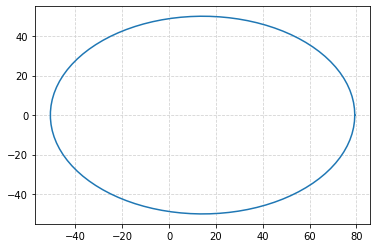

In [42]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi

u=1.     #x-position of the center
v=0.5    #y-position of the center
a=2.     #radius on the x-axis
b=1.5    #radius on the y-axis

t = np.linspace(0, 2*pi, 100)
plt.plot(focusx+65*np.cos(t) , 50*np.sin(t) )
plt.grid(color='lightgray',linestyle='--')
plt.show()